## Linear SVM Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [2]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [3]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

## Nonlinear SVM CLassification

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


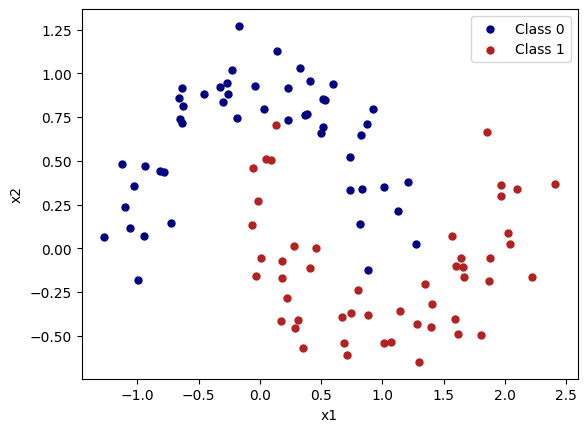

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[y==0, 0], X[y==0, 1], color='navy', label='Class 0', s=25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='firebrick', label='Class 1', s=25)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Polynomial Kernel

In [6]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(), 
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


### Gaussian RBF Kernel

In [7]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=1, C=1))
rbf_kernel_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1
,kernel,'rbf'
,degree,3
,gamma,1


### SVM Regression

In [25]:
import numpy as np

X = np.random.rand(50, 1) - np.ones([50, 1]) * 0.5
noise = np.random.rand(50, 1) * 0.5
y = 1 + X + 3 * X ** 2 + noise

X_test = np.random.rand(20, 1) - np.ones([20, 1]) * 0.5
noise = np.random.rand(20, 1) * 0.5
y_test = 1 + X_test + 3 * X_test ** 2 + noise

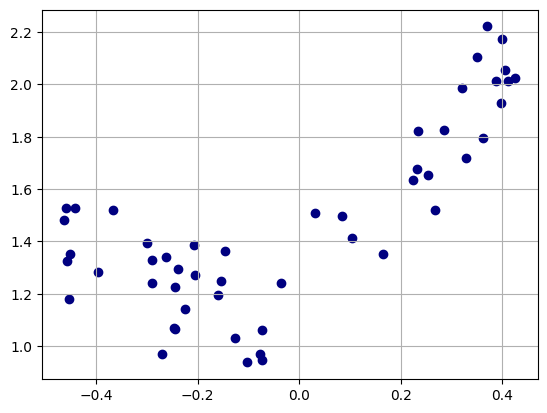

In [26]:
plt.scatter(X, y, color="navy")
plt.grid()

In [27]:
from sklearn.svm import LinearSVR
from sklearn.metrics import root_mean_squared_error

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.01, random_state=42))
svm_reg.fit(X, y.ravel())
y_pred = svm_reg.predict(X_test)

root_mean_squared_error(y_pred, y_test.ravel())

0.21007170295553618

In [28]:
from sklearn.svm import SVR

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=10, epsilon=0.01))
svm_poly_reg.fit(X, y.ravel())
y_pred = svm_poly_reg.predict(X_test)

root_mean_squared_error(y_pred, y_test.ravel())

0.23759491722965828

In [29]:
import numpy as np

X = np.array([
    [2, 5],
    [2, 4],
    [3, 4],
    [2, 3],
    [3, 1],
    [4, 1],
    [4, 2],
    [5, 2]
])

y = np.array([
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0
])

model = make_pipeline(StandardScaler(),
                      LinearSVC(C=100)) 
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0])